In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pickle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout, LSTM
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
data_folder = '/content/gdrive/MyDrive/University/master/term1/Machine-Learning/ML-Project/Data/'

In [ ]:
# with open(data_folder + 'audio_mfcc_features_40_all_cleaned_denoised.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)

# labels = []
# data = []
# for k in range(len(loaded_data)):
#     for j in range(len(loaded_data[k])):-z
#         for i in range(len(loaded_data[k][j])):
#             if np.shape(loaded_data[k][j][i]) != (1293, 40):
#                 print(k, j , i , np.shape(loaded_data[k][j][i]))
#             else:
#                 labels.append(k)
#                 data.append(loaded_data[k][j][i])
# data = np.array(data)
# labels = np.array(labels)
# np.shape(labels), np.shape(data)

In [ ]:
SHAPE_SIZE = (862, 12)

In [ ]:
file_name  = data_folder + "mfccaudio_chroma_features_12_all_20Sec_cleaned.pkl"
file_name_labels  = data_folder + "mfccaudio_chroma_features_12_all_20Sec_labels_cleaned.pkl"
with open(file_name, 'rb') as file:
    uncleaned_data = pickle.load(file)

with open(file_name_labels, 'rb') as file:
    uncleaned_labels = pickle.load(file)
np.shape(uncleaned_data), np.shape(uncleaned_labels)

((9538, 862, 12), (9538,))

In [ ]:
np.shape(uncleaned_data[0])

(862, 12)

In [ ]:
data = []
labels = []
for k, j in zip(uncleaned_data,uncleaned_labels):
    if np.shape(k) != SHAPE_SIZE:
        print(np.shape(k))
    else:
        data.append(k)
        labels.append(j)
labels = np.array(labels)
data = np.array(data)
np.shape(data), np.shape(labels)

((9538, 862, 12), (9538,))

In [ ]:
np.unique(uncleaned_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
labels = to_categorical(labels)
x_train, x_test, y_train, y_test =  train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=42, stratify=labels)

In [ ]:
np.shape(x_train), np.shape(y_train)

((7630, 862, 12), (7630, 7))

In [ ]:
class Trainer:
    def __init__(self, x_train, y_train, number_of_class=7 ,input_size=None, epochs=1000, optimizer='adam'):
        self.input_size = input_size
        self.model = Sequential()
        self.x_train, self.y_train = x_train, y_train
        self.epochs = epochs
        self.optimizer = optimizer
        self.number_of_class = number_of_class
        self.callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    # define cnn model
    def define_model(self):
        print("Build LSTM RNN model ...")
        self.model = Sequential()

        self.model.add(LSTM(units=128, dropout=0.5, return_sequences=True, input_shape=self.input_size))
        self.model.add(LSTM(units=32,  dropout=0.5, return_sequences=False))
        self.model.add(Dense(units=self.number_of_class, activation="softmax"))
        self.model.compile(optimizer=self.optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        return self.model.summary()

    def fit_model(self):
        # fit model
        self.history = self.model.fit(self.x_train, self.y_train, epochs=self.epochs, batch_size=128,
                                      validation_split=0.2, verbose=1,shuffle=True, 
                                      callbacks=[self.callback])

    def plot_history(self):
        fig = plt.figure(figsize=(12, 4))
        metrics = ['loss', 'accuracy']
        for n, metric in enumerate(metrics):
            plt.subplot(1, 2, n + 1)
            plt.plot(self.history.epoch, self.history.history[metric], label='Train')
            plt.plot(self.history.epoch, self.history.history[f"val_{metric}"], linestyle="--", label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.title(metric)
        plt.legend()
        plt.show()

    def evaluate(self, x_test, y_test):
        y_pred = np.argmax(self.model.predict(x_test), axis=-1)
        print(classification_report(np.argmax(y_test, axis=-1), y_pred, digits=3))



In [ ]:
trainer = Trainer(x_train, y_train, input_size = SHAPE_SIZE, epochs=1000)
trainer.define_model()

Build LSTM RNN model ...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 862, 128)          72192     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 7)                 231       
                                                                 
Total params: 93,031
Trainable params: 93,031
Non-trainable params: 0
_________________________________________________________________


In [14]:
trainer.fit_model()

Epoch 1/1000
48/48 [==============================] - 13s 118ms/step - loss: 1.9342 - accuracy: 0.1848 - val_loss: 1.9080 - val_accuracy: 0.2058
Epoch 2/1000
48/48 [==============================] - 4s 82ms/step - loss: 1.9125 - accuracy: 0.2102 - val_loss: 1.9085 - val_accuracy: 0.2130
Epoch 3/1000
48/48 [==============================] - 4s 89ms/step - loss: 1.9093 - accuracy: 0.2171 - val_loss: 1.9397 - val_accuracy: 0.1625
Epoch 4/1000
48/48 [==============================] - 5s 99ms/step - loss: 1.9439 - accuracy: 0.1658 - val_loss: 1.9257 - val_accuracy: 0.1625
Epoch 5/1000
48/48 [==============================] - 4s 85ms/step - loss: 1.9364 - accuracy: 0.1617 - val_loss: 1.9378 - val_accuracy: 0.1809
Epoch 6/1000
48/48 [==============================] - 4s 87ms/step - loss: 1.9364 - accuracy: 0.1650 - val_loss: 1.9329 - val_accuracy: 0.1999
Epoch 7/1000
48/48 [==============================] - 5s 101ms/step - loss: 1.9389 - accuracy: 0.1579 - val_loss: 1.9368 - val_accuracy: 0.1

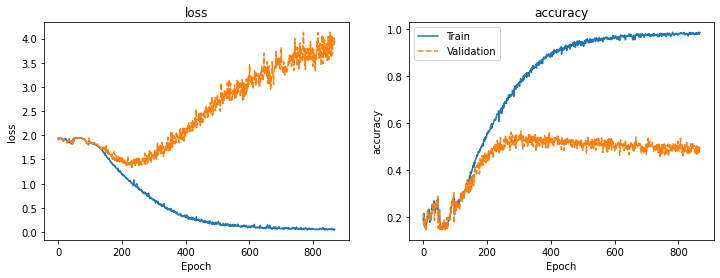

In [15]:
trainer.plot_history()

In [18]:
trainer.evaluate(x_test, y_test)

60/60 [==============================] - 2s 28ms/step
              precision    recall  f1-score   support

           0      0.516     0.263     0.348       251
           1      0.762     0.253     0.380       253
           2      0.379     0.612     0.468       286
           3      0.511     0.454     0.481       295
           4      0.340     0.506     0.407       243
           5      0.447     0.561     0.498       303
           6      0.691     0.574     0.627       277

    accuracy                          0.467      1908
   macro avg      0.521     0.460     0.458      1908
weighted avg      0.519     0.467     0.463      1908



In [19]:
trainer.evaluate(x_train, y_train)

239/239 [==============================] - 7s 30ms/step
              precision    recall  f1-score   support

           0      0.727     0.435     0.544      1003
           1      0.873     0.382     0.531      1011
           2      0.511     0.800     0.624      1146
           3      0.656     0.633     0.644      1181
           4      0.544     0.761     0.634       972
           5      0.619     0.723     0.667      1211
           6      0.808     0.641     0.715      1106

    accuracy                          0.631      7630
   macro avg      0.677     0.625     0.623      7630
weighted avg      0.674     0.631     0.626      7630

